In [25]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

In [26]:
N = int(input("Сколько случайных чисел сгенирировать?(20)") or "20")
min = int(input("Максимальное значение?(0)") or 0)
max = int(input("Максимальное значение?(1)") or 1)
mode = (input("Генерировать рациональные числа вместо целых?(да)") or "да").lower()[0]
m = math.floor(1 + 3.22 * np.log10(N))
m = int(input("Колличество столбиков диаграммы?({})".format(m)) or str(m))

In [27]:
if mode == "д":
    raw_row = min + np.random.rand(N) * max
else:
    raw_row = np.random.randint(min, max, N)
row = np.sort(raw_row)
#Размах
range = row[-1] - row[0]
#Мода
counter = {}
unique = set(row)
moda_max = {"num": -1, "count": 0}
for e in unique:
    count = np.sum([row == e])
    if count > moda_max["count"]:
        moda_max = {"num":[e], "count": count}
    elif count == moda_max["count"]:
        moda_max["num"].append(e)
moda = moda_max["num"]
#Медиана
median = (row[len(row) // 2 - 1] + row[len(row) // 2]) / 2
#Среднее
mean = np.sum(row) / len(row)
#Дисперсия
dispersion = np.sum((row - mean) ** 2) / len(row)
#Среднее квадратичное
mean_square = np.sum(row ** 2) / len(row)
#Эмпирическая функция
low = row[0] - range * 0.1
high = row[-1] + range * 0.1
emperic_function = [(low, 0)]
c = 0
for num in row:
    emperic_function.append((num, c / len(row)))
    c += 1
    emperic_function.append((num, c / len(row)))
emperic_function.append((high, 1))
emperic_function = np.array(emperic_function)

Выборка: [0.73348658 0.00432341 0.23921816 0.5653562  0.5516213  0.92682817
 0.47010484 0.41504    0.51820937 0.37342513 0.57582442 0.79671725
 0.66744256 0.76641056 0.66778528 0.22705776 0.95933937 0.5749108
 0.2239544  0.80837858]
Вариационный ряд: [0.00432341 0.2239544  0.22705776 0.23921816 0.37342513 0.41504
 0.47010484 0.51820937 0.5516213  0.5653562  0.5749108  0.57582442
 0.66744256 0.66778528 0.73348658 0.76641056 0.79671725 0.80837858
 0.92682817 0.95933937]
Размах: 0.9550159562815943
Мода: не найдена, так как ни одно число не повторяется
Медиана: 0.5701335026988561
Выборочное среднее: 0.5532717067321724
Дисперсия: 0.060419918050585275
Выборочное среднее квадратичное: 0.3665294995209163
Эмперическая функция:


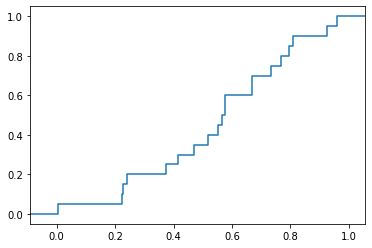

Гистограмма:


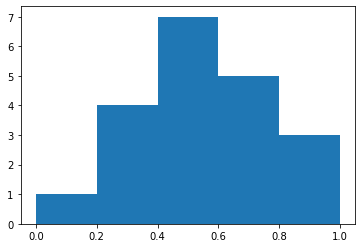

In [28]:
print("Выборка: {}".format(raw_row))
print("Вариационный ряд: {}".format(row))
print("Размах: {}".format(range))
if len(moda) != len(row):
    print("Мода: {}".format(moda))
else:
    print("Мода: не найдена, так как ни одно число не повторяется")
print("Медиана: {}".format(median))
print("Выборочное среднее: {}".format(mean))
print("Дисперсия: {}".format(dispersion))
print("Выборочное среднее квадратичное: {}".format(mean_square))
print("Эмперическая функция:")
plt.plot(emperic_function[:, 0], emperic_function[:, 1])
plt.xlim(low, high)
plt.show()
print("Гистограмма:")
plt.hist(row, bins=m, range=(math.floor(row[0]),math.ceil(row[-1])))
plt.show()